In [ ]:
#Read data 
df = pd.read_csv('https://raw.githubusercontent.com/buildwelllabs/machine.learning.project/master/diabetic_data.csv')
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [ ]:
#Raima Zulqarnain, Xin Guo, Beatrice Donkor, Zheyong Piao, Kishauna Givans
#Group Project_Unit4

#Standard Libraries for visualization and data wrangling 
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns; sns.set()
%matplotlib inline
sns.set_style('whitegrid')
 
#Logistic Regression Models
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
 
%matplotlib inline

In [ ]:
#Select data we want to look at
df = df[["age", "gender",'race','readmitted','insulin','time_in_hospital','number_emergency','num_procedures','num_medications','number_inpatient']]
df

,age,gender,race,readmitted,insulin,time_in_hospital,number_emergency,num_procedures,num_medications,number_inpatient
0,[0-10),Female,Caucasian,NO,No,1,0,0,1,0
1,[10-20),Female,Caucasian,>30,Up,3,0,0,18,0
2,[20-30),Female,AfricanAmerican,NO,No,2,0,5,13,1
3,[30-40),Male,Caucasian,NO,Up,2,0,1,16,0
4,[40-50),Male,Caucasian,NO,Steady,1,0,0,8,0
...,...,...,...,...,...,...,...,...,...,...
101761,[70-80),Male,AfricanAmerican,>30,Down,3,0,0,16,0
101762,[80-90),Female,AfricanAmerican,NO,Steady,5,0,3,18,1
101763,[70-80),Male,Caucasian,NO,Down,1,0,0,9,0
101764,[80-90),Female,Caucasian,NO,Up,10,0,2,21,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   age               101766 non-null  object
 1   gender            101766 non-null  object
 2   race              101766 non-null  object
 3   readmitted        101766 non-null  object
 4   insulin           101766 non-null  object
 5   time_in_hospital  101766 non-null  int64 
 6   number_emergency  101766 non-null  int64 
 7   num_procedures    101766 non-null  int64 
 8   num_medications   101766 non-null  int64 
 9   number_inpatient  101766 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 7.8+ MB


In [ ]:
df.describe()

,time_in_hospital,number_emergency,num_procedures,num_medications,number_inpatient
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,0.197836,1.339730,16.021844,0.635566
std,2.985108,0.930472,1.705807,8.127566,1.262863
min,1.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,10.000000,0.000000
50%,4.000000,0.000000,1.000000,15.000000,0.000000
75%,6.000000,0.000000,2.000000,20.000000,1.000000
max,14.000000,76.000000,6.000000,81.000000,21.000000


EDA (Exploratory Data Analysis)


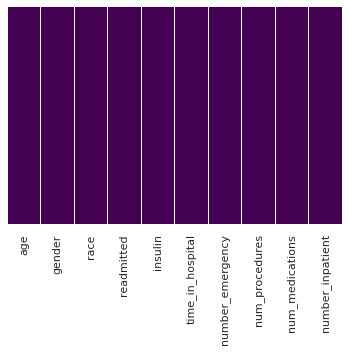

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

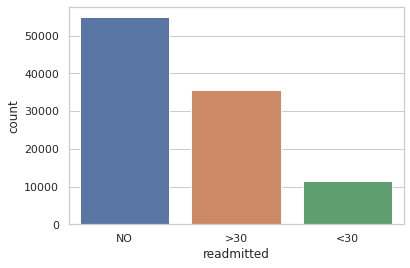

In [ ]:
#Visualize data; Readmitted
sns.set_style('whitegrid')
sns.countplot(x='readmitted', data=df)

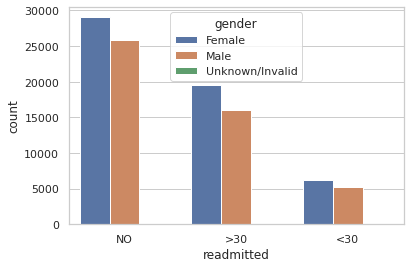

In [ ]:
#Visualize data; Readmitted-Gender
sns.set_style('whitegrid')
sns.countplot(x='readmitted', hue='gender', data=df)

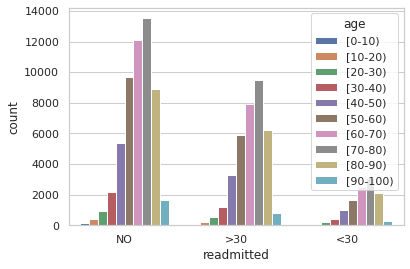

In [ ]:
#Visualize data; Readmitted-Age
sns.set_style('whitegrid')
sns.countplot(x='readmitted', hue='age', data=df)

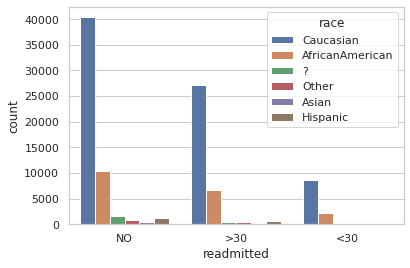

In [ ]:
#Visualize data; Readmitted-Race
sns.set_style('whitegrid')
sns.countplot(x='readmitted', hue='race', data=df)

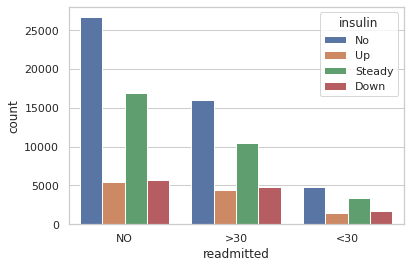

In [ ]:
#Visualize data; Readmitted-Insulin
sns.set_style('whitegrid')
sns.countplot(x='readmitted', hue='insulin', data=df)

Data Cleaning and Data Pre - Processing

In [ ]:
#Change gender to numerical value 
gender = pd.get_dummies(df['gender'], drop_first=True)
df.drop(['gender'], axis=1, inplace= True)
df = pd.concat([df, gender],axis=1)
df.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,age,race,readmitted,insulin,time_in_hospital,number_emergency,num_procedures,num_medications,number_inpatient,Male,Unknown/Invalid
0,[0-10),Caucasian,NO,No,1,0,0,1,0,0,0
1,[10-20),Caucasian,>30,Up,3,0,0,18,0,0,0
2,[20-30),AfricanAmerican,NO,No,2,0,5,13,1,0,0
3,[30-40),Caucasian,NO,Up,2,0,1,16,0,1,0
4,[40-50),Caucasian,NO,Steady,1,0,0,8,0,1,0


In [ ]:
#Change race to numerical value 
def impute_race(cols):
  race = cols[0]
  if race == 'Caucasian':
    return 1
  elif race == 'African American':
    return 2
  elif race == 'Asian':
    return 3
  elif race == 'Hispanic':
    return 4 
  else:
    return 5 
df['race']=df[['race']].apply(impute_race,axis=1)
df.head()

,age,race,readmitted,insulin,time_in_hospital,number_emergency,num_procedures,num_medications,number_inpatient,Male,Unknown/Invalid
0,[0-10),1,NO,No,1,0,0,1,0,0,0
1,[10-20),1,>30,Up,3,0,0,18,0,0,0
2,[20-30),5,NO,No,2,0,5,13,1,0,0
3,[30-40),1,NO,Up,2,0,1,16,0,1,0
4,[40-50),1,NO,Steady,1,0,0,8,0,1,0


In [ ]:
#Change age to numerical value 
def impute_age(cols):
  age = cols[0]
  if age == '[0-10)':
    return 10
  elif age == '[10-20)':
    return 20
  elif age == '[20-30)':
    return 30
  elif age == '[30-40)':
    return 40 
  elif age == '[40-50)':
    return 50
  elif age == '[50-60)':
    return 60
  elif age == '[60-70)':
    return 70 
  elif age == '[70-80)':
    return 80
  elif age == '[80-90)':
    return 90 
  elif age == '[90-100)':
    return 100
  else:
    return 
df['age']=df[['age']].apply(impute_age,axis=1)
df.head()

,age,race,readmitted,insulin,time_in_hospital,number_emergency,num_procedures,num_medications,number_inpatient,Male,Unknown/Invalid
0,10,1,NO,No,1,0,0,1,0,0,0
1,20,1,>30,Up,3,0,0,18,0,0,0
2,30,5,NO,No,2,0,5,13,1,0,0
3,40,1,NO,Up,2,0,1,16,0,1,0
4,50,1,NO,Steady,1,0,0,8,0,1,0


In [ ]:
#Change readmitted to numerical value 
def impute_readmitted(cols):
  readmitted = cols[0]
  if readmitted == 'NO':
    return 0
  elif readmitted == '>30':
    return 1
  elif readmitted == '<30':
    return 2
  else:
    return  
df['readmitted']=df[['readmitted']].apply(impute_readmitted,axis=1)
df.head()

,age,race,readmitted,insulin,time_in_hospital,number_emergency,num_procedures,num_medications,number_inpatient,Male,Unknown/Invalid
0,10,1,0,No,1,0,0,1,0,0,0
1,20,1,1,Up,3,0,0,18,0,0,0
2,30,5,0,No,2,0,5,13,1,0,0
3,40,1,0,Up,2,0,1,16,0,1,0
4,50,1,0,Steady,1,0,0,8,0,1,0


In [ ]:
#Change insulin to numerical value 
def impute_insulin(cols):
  insulin = cols[0]
  if insulin == 'No':
    return 0
  elif insulin == 'Up':
    return 1
  elif insulin == 'Steady':
    return 2
  elif insulin == 'Down':
    return 3
  else:
    return  
df['insulin']=df[['insulin']].apply(impute_insulin,axis=1)
df.head()

,age,race,readmitted,insulin,time_in_hospital,number_emergency,num_procedures,num_medications,number_inpatient,Male,Unknown/Invalid
0,10,1,0,0,1,0,0,1,0,0,0
1,20,1,1,1,3,0,0,18,0,0,0
2,30,5,0,0,2,0,5,13,1,0,0
3,40,1,0,1,2,0,1,16,0,1,0
4,50,1,0,2,1,0,0,8,0,1,0


In [ ]:
df.dropna(inplace=True)
df.tail()

,age,race,readmitted,insulin,time_in_hospital,number_emergency,num_procedures,num_medications,number_inpatient,Male,Unknown/Invalid
101761,80,5,1,3,3,0,0,16,0,1,0
101762,90,5,0,2,5,0,3,18,1,0,0
101763,80,1,0,3,1,0,0,9,0,1,0
101764,90,1,0,1,10,0,2,21,1,0,0
101765,80,1,0,0,6,0,3,3,0,1,0


Model building

In [ ]:
y = df['readmitted']
X = df[['age','Male','insulin','race']]
#X.fit_transform(labels.values.tolist())
#X = np.array([[df.race, df.age, df.Male, df.insulin]])
#y=np.array(df['readmitted'].values.tolist())
#X=X.reshape(X.shape[1:])
#X = X.transpose()
len(X) == len(y)

True

In [ ]:
X_df, X_test, y_df, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [ ]:
sc = StandardScaler()
X_df = sc.fit_transform(X_df)
X_test = sc.transform(X_test)

In [ ]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_df, y_df)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predict = logmodel.predict(X_df)

Classification report

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predict))

ValueError: ignored

In [ ]:
print(classification_report(y_test,predict))

ValueError: ignored

Conclusion- We decided to look at 4 features: age, race, gender and insulin adn the output would be readmission. We wanted to look at how these features affected the probability of a patient being readmitted. We used 70% of the data to train the model and tested with the remaining 30%. After building the model, when we tried running the classification report and confusion matrix, we ran into an error (ValueError: Found input variables with inconsistent numbers of samples: [30530, 71236]). The error is showing up because python thinks that the length of X and y are not the same, but after we ran a couple tests, we found that len(X)=len(y) == True. We tried changing the output to a different one and singled out the inputs, but the error remained. The error could be due to something within pandas dataframe. 